In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = "{:,.4f}".format
from IPython.display import Image

from src.inference import inference
from src.reconstruct import reconstruct
from src.visualize import visualize
from src.likelihood import likelihood
from src.maxProbInfer import maxProbInfer
from src.emInfer import emInfer

In this notebook, we will use the baysian network in the image below for the purpose of our calculations. The network consists of 2𝐿 + 1 noisy OR gates connected in the configuration described in the figure below. Each noisy OR gate receives two bits as input (in1 and in2) and its output (out) is equal to (in1 OR in2) with probability 1 − 𝑝, and equal to NOT(in1 OR in2) with probability 𝑝. The probability 𝑝 captures the level of noise, and its value is a system parameter. Another system parameter is the probability, 𝑞, in which every input is assigned value 1 (it is assigned value 0 with probability 1 − 𝑞).

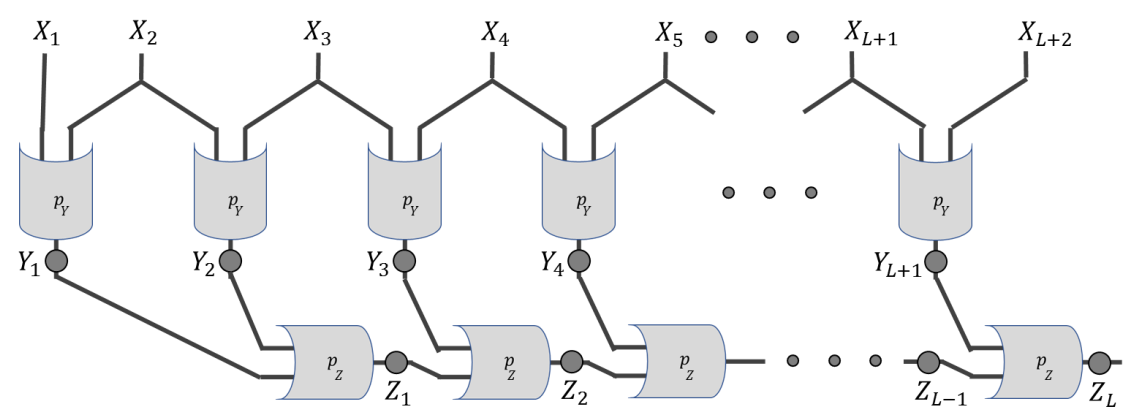

In [2]:
Image(filename='circuit_config.png') 

# Question 1

In this problem, we wish to infer a joint assignment to all hidden RVs ($𝑋_1, … , 𝑋_{𝐿+2}, 𝑌_1, … , 𝑌_{𝐿+1}$), which maximizes their joint probability with the observed outputs of the lowers gate ($𝑍_1, … , 𝑍_𝐿$). More formally, we wish to compute:   
$argmax_{\bar x,\bar y}{𝑃(𝑋_1 … 𝑋_{𝐿+2} = \bar x, 𝑌_1 … 𝑌_{𝐿+1} = \bar y, 𝑍_1 … 𝑍_𝐿 = \bar z)}$


The following computer program implements an elimination algorithm that performs a perfect elimination order for the purpose of computing the best joint assignment. The program should receive the following as input:  
• A sequence of observed values 𝑧̅(of user-defined length).  
• The value of the noise parameter, 𝑝, for the noisy OR gate.   
• The prior probability, 𝑞, for an input bit having the value of 1. 
• Whether probabilities should be calculate as log probabilities
   
The program’s output should specify the optimal assignment and its joint probability with the observations.

In [3]:
z = "00001111000"
p = 0.1
q = 0.4
log = True
inf_dict = inference(z, p, p, q, log)
prob, assignment = reconstruct(z, p, p, q, inf_dict, log)
visualize(z, p, p, q, log, prob, assignment)

Observed Sequence Z = 00001111000
Parameters: py = 0.1, pz = 0.1, q = 0.4
Optimal assignment to hidden RVs:
Xi:   0 0 0 0 0 0 1 0 0 0 0 0 0 
       V V V V V V V V V V V V
Yi:    0 0 0 0 0 1 1 0 0 0 0 0
        V / / / / / / / / / /
Zi:     0-0-0-0-1-1-1-1-0-0-0
Joint Probability P(X,Y,Z) = -11.666714654532267


In [4]:
z = "00001111000"
p = 0.01
q = 0.6
log = True
inf_dict = inference(z, p, p, q, log)
prob, assignment = reconstruct(z, p, p, q, inf_dict, log)
visualize(z, p, p, q, log, prob, assignment)

Observed Sequence Z = 00001111000
Parameters: py = 0.01, pz = 0.01, q = 0.6
Optimal assignment to hidden RVs:
Xi:   0 0 0 0 0 0 1 1 1 1 0 0 0 
       V V V V V V V V V V V V
Yi:    0 0 0 0 0 1 1 1 1 1 0 0
        V / / / / / / / / / /
Zi:     0-0-0-0-1-1-1-1-0-0-0
Joint Probability P(X,Y,Z) = -15.11619665669648


# Question 2

The following computer program implements a message passing algorithm to calculate the posterior probability of each hidden RV being equal to 1. The program should do the following:  
• Compute all the messages needed in the network for calculating posterior probabilities.  
• Use these messages to compute the joint probabilities.   
• Use the joint probabilities to compute the data likelihood ($𝑃(𝑍_1 … 𝑍_𝐿 = 𝑧̅)$).  
• Use the likelihood and the joint probabilities to compute the posterior probability distribution for each RV, i.e., $𝑃(𝑋_𝑖 = 0/1 | 𝑍_1 … 𝑍_𝐿 = 𝑧̅) , 𝑃(𝑌_𝑖 = 0/1 | 𝑍_1 … 𝑍_𝐿 = 𝑧̅).$   

The program should recieve the following input:  
• A sequence of observed values 𝑧̅(of user-defined length).   
• The value of the noise parameter, 𝑝, for the noisy OR gate.   
• The prior probability, 𝑞, for an input bit having the value of 1.   

The program’s output should specify the data likelihood, and the posterior probability for each hidden RV to have the bit value 1. You may specify this probability as an integer percent value. All calculations should be done with log-probabilities.

In [5]:
z = "00001111000"
p = 0.1
q = 0.4

cd, lr, rl, likely, Xs, Ys = likelihood(z, p, q)

Observed Sequence Z = 00001111000
Parameters: p = 0.1, q = 0.4
Optimal assignment to hidden RVs:
Xi:   18 13  6  4  6 24 67 40 40 40 14  6 14
        V  V  V  V  V  V  V  V  V  V  V  V
Yi:    19 15  6  6 14 90 74 61 61 49 10 10
         V  /  /  /  /  /  /  /  /  /  /
Zi:      0--0--0--0--1--1--1--1--0--0--0
Data Log Likelihood ln(P(Z)) = -8.321702805042117


In [6]:
z = "00001111000"
p = 0.01
q = 0.6

cd, lr, rl, likely, Xs, Ys = likelihood(z, p, q)

Observed Sequence Z = 00001111000
Parameters: p = 0.01, q = 0.6
Optimal assignment to hidden RVs:
Xi:   5  4  0  0  0  5 97 60 60 60  3  0  3
       V  V  V  V  V  V  V  V  V  V  V  V
Yi:    5  4  0  0  2 99 98 83 83 61  2  2
        V  /  /  /  /  /  /  /  /  /  /
Zi:     0--0--0--0--1--1--1--1--0--0--0
Data Log Likelihood ln(P(Z)) = -13.345356574350538


# Question 3

### Part A

The following computer program infers the model parameters by implementing maximum-probability parameter inference. The program should receive the following as input:   
• A sequence of observed values 𝑧̅(of user-defined length).   
• An initial value for the two noise parameters, 𝑝𝑌 and 𝑝𝑍 (you will use the same initial value for both parameters).   
• An initial value for the prior probability, 𝑞, for the inputs.   
   
The program should iteratively update the parameter values using maximum-probability assignments to the hidden RVs.  

• Use the maximum-probability assignment to compute the sufficient statistics.    
• Make sure that the log-probability increases from one iteration to the next.   
• Halt the program when the parameters are no longer updated.  
  
The program should print a line for each iteration of the algorithm, specifying the parameter values and the maximum log-probability of an assignment to the hidden RVs, as computed for these parameter values.

In [7]:
z = "0001111000"
py = 0.1
pz = py
q = 0.4
log = True
maxProbInfer(z, py, pz, q, same_p=False)

,Py,Pz,q,log max prob
0,0.1000,0.1000,0.0000,-10.9452
1,0.0000,0.1000,0.0000,-6.4922
2,0.0000,0.2000,0.0000,-5.0040


In [8]:
z = "01010101010"
py = 0.3
pz = py
q = 0.4
log = True
maxProbInfer(z, py, pz, q, same_p=False)

,Py,Pz,q,log max prob
0,0.3000,0.3000,0.0000,-21.1081
1,0.0000,0.4545,0.0000,-14.8023
2,0.0000,0.9091,0.0000,-3.3510


### Part B
  
The following program adds the assumption that the two noise parameters are identical, 𝑝𝑌 = 𝑝𝑍. The only difference should be in the way parameters are updated given the sufficient statistics. 

In [9]:
z = "0001111000"
py = 0.1
pz = py
q = 0.4
log = True
maxProbInfer(z, py, pz, q, same_p=True)

,Py,Pz,q,log max prob
0,0.1000,0.1000,0.0833,-10.9452
1,0.0476,0.0476,0.0833,-7.4624


In [10]:
z = "01010101010"
py = 0.3
pz = py
q = 0.4
log = True
maxProbInfer(z, py, pz, q, same_p=True)

,Py,Pz,q,log max prob
0,0.3000,0.3000,0.3846,-21.1081
1,0.2174,0.2174,0.3846,-20.7041


# Question 4

### Part A

The following computer program infers the model parameters by implementing expectation maximization (EM) parameter inference. The program should receive the same input as the program in the previous problem. It should iteratively update the parameter values by computing expected values of the sufficient statistics, as follows:   
• Compute message tables and posterior conditional probability tables for all hidden RVs.     
• Use the tables you computed above to compute the expected sufficient statistics. Maintain calculations in log-probabilities and avoid exponentiating joint probabilities.   
• Make sure that the log-likelihood increases from one iteration to the next.   
• Halt the program when increase in log-likelihood is smaller than 𝜖 = 0.0001.   
      
The program should print a line for each iteration of the algorithm, specifying the parameter values and the log-likelihood of these parameter values.

In [11]:
z = "0001111000"
py = 0.1
pz = 0.1
q = 0.4

cd, lr, rl, iteration_df = emInfer(z, py, pz, q, same_p=False)

iteration_df.iloc[np.r_[0:7, -3:0]]

,Py,Pz,q,log likelihood
0,0.1000,0.1000,0.4000,-7.6469
1,0.0961,0.1741,0.2411,-6.2725
2,0.0816,0.1928,0.1575,-5.8035
3,0.0664,0.1891,0.1046,-5.5238
4,0.0532,0.1832,0.0703,-5.3474
5,0.0429,0.1813,0.0484,-5.2404
6,0.0351,0.1827,0.0342,-5.1736
50,0.0000,0.2000,0.0000,-5.0041
51,0.0000,0.2000,0.0000,-5.0041
52,0.0000,0.2000,0.0000,-5.0041


In [12]:
z = "01010101010"
py = 0.3
pz = 0.3
q = 0.4

cd, lr, rl, iteration_df = emInfer(z, py, pz, q, same_p=False)

iteration_df.iloc[np.r_[0:7, -3:0]]

,Py,Pz,q,log likelihood
0,0.3000,0.3000,0.4000,-10.2286
1,0.2843,0.6277,0.4254,-6.5360
2,0.2988,0.7863,0.4047,-5.4284
3,0.3297,0.8768,0.3579,-4.7178
4,0.3568,0.9337,0.3055,-4.1999
5,0.3675,0.9669,0.2569,-3.8542
6,0.3578,0.9845,0.2122,-3.5913
35,0.1548,1.0000,0.0000,-2.0941
36,0.1548,1.0000,0.0000,-2.0941
37,0.1548,1.0000,0.0000,-2.0941


### Part B

The following code adds the assumption that the two noise parameters are identical, 𝑝𝑌 = 𝑝𝑍. The only difference should be in the way parameters are updated given the expected sufficient statistics. 

In [13]:
z = "0001111000"
py = 0.1
pz = py
q = 0.4

cd, lr, rl, iteration_df = emInfer(z, py, pz, q, same_p=True)

iteration_df.iloc[np.r_[0:6, -4:0]]

,Py,Pz,q,log likelihood
0,0.1000,0.1000,0.4000,-7.6469
1,0.1333,0.1333,0.2411,-6.4388
2,0.1409,0.1409,0.1551,-5.9844
3,0.1391,0.1391,0.1022,-5.7385
4,0.1355,0.1355,0.0685,-5.5934
5,0.1330,0.1330,0.0468,-5.5064
28,0.1349,0.1349,0.0000,-5.3399
29,0.1349,0.1349,0.0000,-5.3398
30,0.1349,0.1349,0.0000,-5.3398
31,0.1349,0.1349,0.0000,-5.3398


In [14]:
z = "01010101010"
py = 0.3
pz = py
q = 0.4

cd, lr, rl, iteration_df = emInfer(z, py, pz, q, same_p=True)

iteration_df.iloc[np.r_[0:6, -4:0]]

,Py,Pz,q,log likelihood
0,0.3000,0.3000,0.4000,-10.2286
1,0.4486,0.4486,0.4254,-8.2060
2,0.5738,0.5738,0.4272,-6.8359
3,0.6847,0.6847,0.4310,-5.7016
4,0.7786,0.7786,0.4536,-4.7237
5,0.8534,0.8534,0.4987,-3.8506
45,0.9999,0.9999,0.6168,-2.3439
46,1.0000,1.0000,0.6168,-2.3439
47,1.0000,1.0000,0.6167,-2.3439
48,1.0000,1.0000,0.6167,-2.3439


## Question 5

Execute the programs that you wrote in the previous 2 problems to infer parameters for the following three input sequences:   
• $\bar z_1 = 00000000000000000000000001111111111111111111111111$   
• $\bar z_2 = 00000111110000011111000001111100000111110000011111$    
• $\bar z_3 = 00110011001100110011001100110011001100110011001100$     
     
Run each of the four variants of inference programs on each of the three sequences. In each case, use multiple starting points to convince yourself (and others) that you eventually found the parameter values that maximize the relevant score. Write a short report on your experiments and your findings. Your report should include the following points:   
   
• Clearly describe the approach or method you used to select starting initial values for the parameters. Argue why you think that your approach covers the relevant space while avoiding an exhaustive search of parameter space.   
• Specify the values you found for the model parameters and the associated score for each of the three data sets in each of the four methods (12 parameter assignments total).   
• For each data set, specify whether you found qualitative differences between the results you got using max-prob inference and the EM algorithm. Can you explain the cause for these differences (or lack thereof)?   
• For each data set, try to think whether it was generated by a model with one type of noisy OR gate (𝑝𝑌 = 𝑝𝑍) or two different types (𝑝𝑌 ≠ 𝑝𝑍). For this purpose, use the values inferred by the two types of EM algorithms. Discuss the differences you see in the two types of inference, and try to reach a conclusion about the generating model (whether 𝑝𝑌 = 𝑝𝑍 or 𝑝𝑌 ≠ 𝑝𝑍).

### Init V1

In [15]:
z1 = '00000000000000000000000001111111111111111111111111'
z2 = '00000111110000011111000001111100000111110000011111'
z3 = '00110011001100110011001100110011001100110011001100'
zs = [z1, z2, z3]

In [16]:
# initial parameters sets
init_params = [(0.5, 0.5, 0.5),
               (0.5, 0.5, 0.9),
               (0.5, 0.5, 0.1),
               (0.1, 0.1, 0.1),
               (0.1, 0.1, 0.5),
               (0.1, 0.1, 0.9),
               (0.9, 0.9, 0.1),
               (0.9, 0.9, 0.5),
               (0.9, 0.9, 0.9)]

In [17]:
MPs = []
numIter_MP = []
EMs = []
numIter_EM = []
MPs2 = []
numIter_MP2 = []
EMs2 = []
numIter_EM2 = []
for i, z in enumerate(zs):
    for set_param in init_params:
        py, pz, q = set_param
        # get results
        result_mp = maxProbInfer(z, py, pz, q, same_p=False)
        result_mp2 = maxProbInfer(z, py, pz, q, same_p=True)
        _, _, _, result_em = emInfer(z, py, pz, q, same_p=False)
        _, _, _, result_em2 = emInfer(z, py, pz, q, same_p=True)
        
        # append scores and numIters
        MPs.append(result_mp.iloc[-1]['log max prob'])
        MPs2.append(result_mp2.iloc[-1]['log max prob'])
        EMs.append(result_em.iloc[-1]['log likelihood'])
        EMs2.append(result_em2.iloc[-1]['log likelihood'])
        numIter_MP.append(len(result_mp))
        numIter_EM.append(len(result_em))
        numIter_MP2.append(len(result_mp2))
        numIter_EM2.append(len(result_em2))

In [18]:
# print result to compare for the best init params
K = len(init_params)
for i in range(3):
    print(f'\nz{i+1}: {zs[i]} --')
    df = pd.DataFrame({'setup':[j for j in init_params], 
                        'MP score':MPs[i*K:(i+1)*K], 
                        'MP num_iter':numIter_MP[i*K:(i+1)*K], 
                        'MP Same_P score':MPs2[i*K:(i+1)*K], 
                        'MP Same_P num_iter':numIter_MP2[i*K:(i+1)*K], 
                        'EM Score':EMs[i*K:(i+1)*K], 
                        'EM num_iter':numIter_EM[i*K:(i+1)*K],
                        'EM Same_P Score':EMs2[i*K:(i+1)*K], 
                        'EM Same_P num_iter' :numIter_EM2[i*K:(i+1)*K]})
    print(df.set_index('setup'))


z1: 00000000000000000000000001111111111111111111111111 --
                 MP score  MP num_iter  MP Same_P score  MP Same_P num_iter  \
setup                                                                         
(0.5, 0.5, 0.5)   -4.9020            2          -5.6102                   2   
(0.5, 0.5, 0.9)   -9.8435            2         -74.9049                   3   
(0.5, 0.5, 0.1)   -4.9020            2          -5.6102                   2   
(0.1, 0.1, 0.1)   -4.9020            2          -5.6102                   2   
(0.1, 0.1, 0.5)   -4.9416            2          -4.9416                   2   
(0.1, 0.1, 0.9)  -39.5989            3         -61.4611                   2   
(0.9, 0.9, 0.1)  -34.6574            2         -56.5196                   3   
(0.9, 0.9, 0.5)  -34.6574            3         -56.5196                   4   
(0.9, 0.9, 0.9)   -9.8435            3         -74.9049                   2   

                 EM Score  EM num_iter  EM Same_P Score  EM Same_P num_

#### Report - Choice of Initial parameters:

To get the best initial parameters for this report, we proposed 9 cases, with varying p (py=pz) and q in 3 different values (0.1, 0.5, 0.9), and choose among the nine parameter one with the best output overall. The result of all nine sets can be seen above. 

Eventually, we decided the (0.5, 0.5, 0.5) will be our choice, since it gives the best score in all Maximum Probability Assignment (MP) algorithm, while converging faster in the Expectation Maximization algorithm (with a notable expection of z2 with the different py/pz variation, converging only after 230 iterations). We chose this according to score from MP since all MP cases run quickly, and speed from EM because of the similar scores in all EM runs.

### Init V2

In [19]:
def best_init(z, same_p):
    param_options = [.1, .5, .9]
    q = .5

    likelihoods = []
    for p in param_options:
        _, _, _, df = emInfer(z, p, p, q, same_p, init=True)
        likelihoods.append(df.iloc[0]['log likelihood'])

    likelihoods = np.array(likelihoods)
    p = param_options[np.argmax(likelihoods)]

    likelihoods = []
    for q in param_options:
        _, _, _, df = emInfer(z, p, p, q, same_p, init=True)
        likelihoods.append(df.iloc[0]['log likelihood'])

    likelihoods = np.array(likelihoods)
    q = param_options[np.argmax(likelihoods)]

    return p, q

best_params = []
for z in zs:
    best_params.append(best_init(z, False))
    
best_params

[(0.1, 0.1), (0.1, 0.1), (0.5, 0.1)]

In [20]:
best_params = []
for z in zs:
    best_params.append(best_init(z, True))
    
best_params

[(0.1, 0.1), (0.1, 0.1), (0.5, 0.1)]

#### Report - Choice of Initial parameters:

For this version of initializing parameters we first choose between (.1, .5, .9) for our py and pz values while keeping q constant at .5 and calculating likelihood of the given z with these different initializations.  The py/pz value that gives us the highest likelihood will be the one we continue with (z1=.1, z2=.1, z3=.5).  We manipulate py/pz first because manipulating q first will result in the same likelihood across all values.

The next step we take is to choose between (.1, .5, .9) for our q value while holding py/pz constant at the selected value in the previous stage.  Again, the q value that gives us the highest likelihood is the one we will assign for initialization (.1 for all zs).

The approach covers the relevant space while avoiding an exhaustive search because we focus on altering one parameter at a time and only look at a single low, medium, and high value for the parameter to get a general idea of where it should begin.

The benefits of this approach is that we only iterate through 6 different combinations of q and py/pz combinations to choos initial parameters.  We also only focus on maximizing initial likelihood which is less computationaly heavy then iterating through the entire ML and EM functions.  

The downside of this approach is that we are not considering how many iterations these initial parameters might need to converge.  Also by changing only one parameter at a time, there might be some information loss by not exploring all combinations simultanously.


### Result V1

As concluded above, we choose (0.5, 0.5, 0.5) to be our initial param. The result can be seen below.

In [21]:
py, pz, q = 0.5, 0.5, 0.5
for i, z in enumerate(zs):
    print(f'\n-------z{i+1}--------')
    # get results
    mp = maxProbInfer(z, py, pz, q, same_p=False)
    print(f"MaxInfer diff p: py={mp['Py'].iloc[-1]:.3f}, pz={mp['Pz'].iloc[-1]:.3f}, q={mp['q'].iloc[-1]:.3f}, likelihood={mp['log max prob'].iloc[-1]:.3f}, numIter={len(mp)}")
    mp2 = maxProbInfer(z, py, pz, q, same_p=True)
    print(f"MaxInfer same p: py={mp2['Py'].iloc[-1]:.3f}, pz={mp2['Pz'].iloc[-1]:.3f}, q={mp2['q'].iloc[-1]:.3f}, likelihood={mp2['log max prob'].iloc[-1]:.3f}, numIter={len(mp2)}")
    _, _, _, em = emInfer(z, py, pz, q, same_p=False)
    print(f"ExpMaxim diff p: py={em['Py'].iloc[-1]:.3f}, pz={em['Pz'].iloc[-1]:.3f}, q={em['q'].iloc[-1]:.3f}, likelihood={em['log likelihood'].iloc[-1]:.3f}, numIter={len(em)}")
    _, _, _, em2 = emInfer(z, py, pz, q, same_p=True)
    print(f"ExpMaxim same p: py={em2['Py'].iloc[-1]:.3f}, pz={em2['Pz'].iloc[-1]:.3f}, q={em2['q'].iloc[-1]:.3f}, likelihood={em2['log likelihood'].iloc[-1]:.3f}, numIter={len(em2)}")


-------z1--------
MaxInfer diff p: py=0.000, pz=0.020, q=0.000, likelihood=-4.902, numIter=2
MaxInfer same p: py=0.010, pz=0.010, q=0.000, likelihood=-5.610, numIter=2
ExpMaxim diff p: py=0.989, pz=0.000, q=0.826, likelihood=-4.281, numIter=27
ExpMaxim same p: py=0.000, pz=0.000, q=0.036, likelihood=-4.315, numIter=35

-------z2--------
MaxInfer diff p: py=0.000, pz=0.180, q=0.000, likelihood=-23.570, numIter=2
MaxInfer same p: py=0.089, pz=0.089, q=0.000, likelihood=-30.348, numIter=2
ExpMaxim diff p: py=0.992, pz=0.174, q=0.897, likelihood=-23.567, numIter=230
ExpMaxim same p: py=0.129, pz=0.129, q=0.000, likelihood=-23.878, numIter=69

-------z3--------
MaxInfer diff p: py=0.000, pz=0.480, q=0.000, likelihood=-34.617, numIter=2
MaxInfer same p: py=0.238, pz=0.238, q=0.000, likelihood=-55.381, numIter=3
ExpMaxim diff p: py=0.499, pz=0.510, q=0.500, likelihood=-34.652, numIter=9
ExpMaxim same p: py=0.509, pz=0.509, q=0.500, likelihood=-34.653, numIter=13


### Result V2

In [22]:
ps = [0.1, 0.1, 0.5]
qs = [0.1, 0.1, 0.1]


for i, z in enumerate(zs):
    py, pz, q = ps[i], ps[i], qs[i]
    print(f'\n-------z{i+1}--------')
    # get results
    mp = maxProbInfer(z, py, pz, q, same_p=False)
    print(f"MaxInfer diff p: py={mp['Py'].iloc[-1]:.3f}, pz={mp['Pz'].iloc[-1]:.3f}, q={mp['q'].iloc[-1]:.3f}, likelihood={mp['log max prob'].iloc[-1]:.3f}, numIter={len(mp)}")
    mp2 = maxProbInfer(z, py, pz, q, same_p=True)
    print(f"MaxInfer same p: py={mp2['Py'].iloc[-1]:.3f}, pz={mp2['Pz'].iloc[-1]:.3f}, q={mp2['q'].iloc[-1]:.3f}, likelihood={mp2['log max prob'].iloc[-1]:.3f}, numIter={len(mp2)}")
    _, _, _, em = emInfer(z, py, pz, q, same_p=False)
    print(f"ExpMaxim diff p: py={em['Py'].iloc[-1]:.3f}, pz={em['Pz'].iloc[-1]:.3f}, q={em['q'].iloc[-1]:.3f}, likelihood={em['log likelihood'].iloc[-1]:.3f}, numIter={len(em)}")
    _, _, _, em2 = emInfer(z, py, pz, q, same_p=True)
    print(f"ExpMaxim same p: py={em2['Py'].iloc[-1]:.3f}, pz={em2['Pz'].iloc[-1]:.3f}, q={em2['q'].iloc[-1]:.3f}, likelihood={em2['log likelihood'].iloc[-1]:.3f}, numIter={len(em2)}")


-------z1--------
MaxInfer diff p: py=0.000, pz=0.020, q=0.000, likelihood=-4.902, numIter=2
MaxInfer same p: py=0.010, pz=0.010, q=0.000, likelihood=-5.610, numIter=2
ExpMaxim diff p: py=0.036, pz=0.000, q=0.001, likelihood=-4.278, numIter=202
ExpMaxim same p: py=0.000, pz=0.000, q=0.036, likelihood=-4.315, numIter=32

-------z2--------
MaxInfer diff p: py=0.000, pz=0.180, q=0.000, likelihood=-23.570, numIter=3
MaxInfer same p: py=0.089, pz=0.089, q=0.000, likelihood=-30.348, numIter=2
ExpMaxim diff p: py=0.021, pz=0.172, q=0.000, likelihood=-23.565, numIter=94
ExpMaxim same p: py=0.129, pz=0.129, q=0.000, likelihood=-23.878, numIter=55

-------z3--------
MaxInfer diff p: py=0.000, pz=0.480, q=0.000, likelihood=-34.617, numIter=2
MaxInfer same p: py=0.238, pz=0.238, q=0.000, likelihood=-55.381, numIter=3
ExpMaxim diff p: py=0.848, pz=0.522, q=0.009, likelihood=-34.622, numIter=1456
ExpMaxim same p: py=0.511, pz=0.511, q=0.100, likelihood=-34.652, numIter=14


### Qualitative difference between MP and EM

For both initialization methods we see one of 2 scenarios.  Either the EM algorithm gives us a significantly better likelihood or the ML and EM algoithm produce very similar likelihoods but not neccisarily similar probabilities.  This tells us that the EM algorithm is more reliable for converging to an optimal likelihood. This is because in the probabilistic approach of using expectation, we explore all possible assignments for each X, Y, and Z variable which contributes more information to the expected probability of a parameter.  The deterministic approach only considers the most probable assignment of the variables and therefore not considering as many probabilities when updating parameters. 

However, EM algorithm takes longer to converge to a result, in the worst case we see in z3 for initialization v2 that MP converges in 2 iterations for different py and pz while EM takes 1456 iterations to converge. This can be a deal breaker if computation efficiency is important. EM algorithm does provide certainty in that it always achieve a similar likelihood score regardless of the initial parameters, as seen previously. 

On the other hand, MP converges very quickly, taking only 2-3 steps to converge, with each iteration being faster to run due to the lower complexity than EM, but the speed comes at a cost of having unreliable result, where changing the initial parameter can drastically change the final output. 

Overall, MP is fast but multiple run with different parameters are needed to get desired output, and EM is slow but reliable. If computation speed is not a concern and the number of choices of parameters is infinite, EM algorithm should be considered first.

### Qualitative difference between model without $p_y=p_z$ and model with $p_y=p_z$

Some interesting observations can be found by comparing algorithms with the restriction of Py=Pz and those without. 

For both initializations:
In the MP algorithm, for all zs we can see that the py=0 with some value of pz in the unrestrictive algorithm, where the value pz is almost double that of the value of py or pz found in the restrictive case. This may suggest the in MP algorithm, since py=pz restriction is inplace, the value of py+pz found in the unrestrictive will be simply evenly shared in the restrictive algorithm. Moreover, the q in both variation of the algorithm is the same, which is zero. Unsurprisingly, we can see the restrictive case having scores lower than the unrestrictive variation.

V1 Init:
In the EM algorithm, it can be induced that the difference between py and pz in the final output correlate to the likelihood score. In z3 where the gap between py and pz is small in the different p case, we can see that not only the p values are similar to the counterpart in the same p case, but the similarity can be found in the values of the likelihood score. In z1 and z2, in the unrestrictive case py and pz is very different, and we can also find larger gap between the scores of restrictive variation and the unrestrictive variation than those in seen in z3. In addition, having the restriction does not seem to affect how quickly the algorithm converges.

V2 Init:
In the EM algorithm, it seems to take significantly more iterations to converge in the unrestrictive case.  There does not seem to be a large difference in likelihood between the two cases. 

For both initializations:
In both algorithm, the py=pz restriction expectedly caused a lower score than the model with such restriction. This is because the restrictive variations of the models are the nested models of the unrestrictive case, and having the linear constraint means less degree of freedom in varying the parameter when running the algorithm (one less degree of freedom to be exact). In terms of how significant is this restrictive on the log likelihood score, we can look at the likelihood ratio test between them.

#### Init V1
For z1: 

MP: $\chi^2 = -2*(-5.610+4.902)=1.416 \to p = 0.2341$ 

EM: $\chi^2 = -2*(-4.315+4.281)=0.068 \to p = 0.7943$ 

For z2: 

MP: $\chi^2 = -2*(-30.348+23.570)=13.556 \to p = 0.0002316$ 

EM: $\chi^2 = -2*(-23.878+23.567)=0.622 \to p = 0.4303$ 

For z3: 

MP: $\chi^2 = -2*(-55.381+34.617)=41.528 \to p = 1.162e-10$ 

EM: $\chi^2 = -2*(-33.653+33.652)=0.002 \to p = 0.9643$ 

#### Init V2
For z1: 

MP: $\chi^2 = -2*(-5.610+4.902)=1.416 \to p = 0.2341$ 

EM: $\chi^2 = -2*(-4.315+4.278)=0.074 \to p = 0.7856$ 

For z2: 

MP: $\chi^2 = -2*(-30.348+23.570)=13.556 \to p = 0.0002316$ 

EM: $\chi^2 = -2*(-23.878+23.565)=0.626 \to p = 0.4288$ 

For z3: 

MP: $\chi^2 = -2*(-55.381+34.617)=41.528 \to p = 1.162e-10$ 

EM: $\chi^2 = -2*(-34.652+34.622)=0.06 \to p = 0.8065$ 

For both initialization methods we come to the same conclusion.

MP:  
For the cases of z2 and z3, We reject the null hypothesis that py=pz results in the same likelihood with over 99.9% confidence.  For z1 we dont have a high enough confidence and therefore cannot reject the null hypothesis.

EM:  
For all zs we are able to get very similar likelihoods regardless of the constraint and even when we produce significantly different py and pz under no constraint.  Therefore we produce very low $\chi^2$ statistics in each case and cannot confidently reject the null hypothesis that py=pz.

Since EM is a more complex function, the restriction has less of an impact on final likelihood and therefore we don't reject the null hypothesis in all instances of z.  MP final likelihood is affected more by the restriction and therefore in the cases of z2 and z3 we reject the null hypothesis but do not reject the null hypothesis for z1.